##     STA302 A1

Haoda Li

In [1]:
# import data
data <- read.csv("A1.csv", sep = ";", skip=0)
x <- data[[3]]
y <- data[[5]]

### Q1

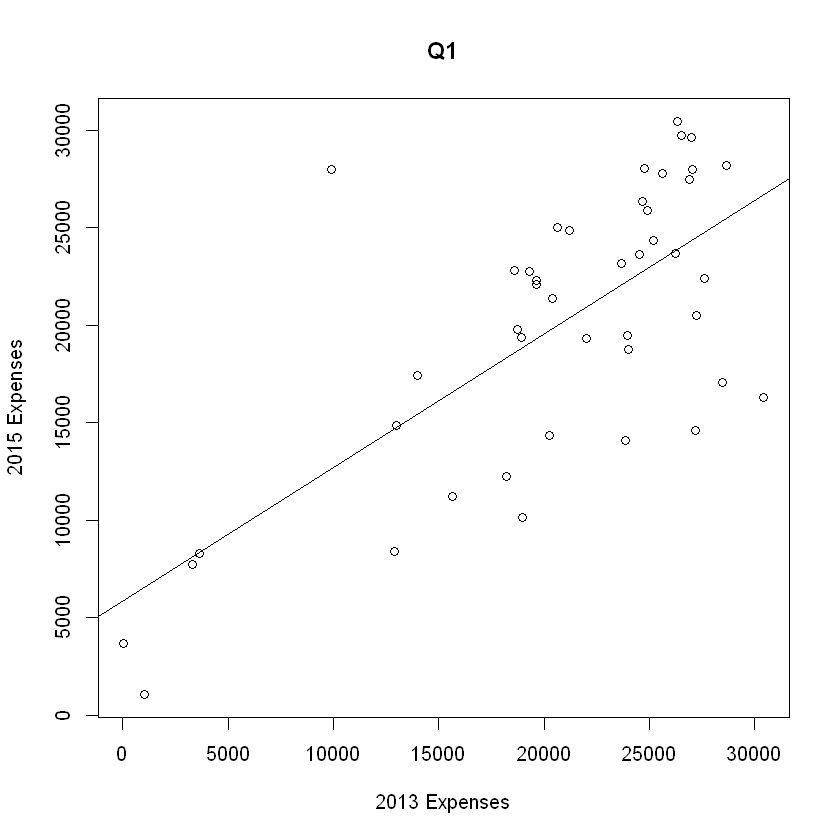

In [2]:
# x is 2013 Expenses, y is 2015 Exprenses
# plot the data points and draw the fitted line
plot(x,y, xlab = "2013 Expenses", ylab = "2015 Expenses", main = "Q1")
fit <- lm(y~x)
abline(fit)

### Q2

In [12]:
# fit is the fitted line obtained in Q1
summary(fit)

(sum((y-(0.6841*x+5855.1183))**2)/42)**0.5


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-10379  -3640   1050   3633  15370 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5855.1183  2334.5168   2.508   0.0161 *  
x              0.6841     0.1067   6.410 1.02e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5286 on 42 degrees of freedom
Multiple R-squared:  0.4945,	Adjusted R-squared:  0.4825 
F-statistic: 41.09 on 1 and 42 DF,  p-value: 1.02e-07


[1] 5285.646

The equation of the line of best fit is
$\: \hat{y} = 5855+ 0.6841x$

Hypothesis tests for $\beta_0$: <br>
$H_0: \beta_0=5855$ <br>
Since the p-value is 0.0161, we can reject $H_0$, it is statistically significant. <br><br>

Hypothesis tests for $\beta_1$: <br>
$H_0: \beta_1=0.6841$ <br>
Since the p-value is $1.02\times 10^{-7}$, we can reject $H_1$, it is statistically significant. <br><br>



In [4]:
# fit the data into a new model given beta0 = 0
# x is 2013 Expenses, y is 2015 Exprenses
fit2 <- lm(y~-1+x)
coef(fit2)

x 
0.9356582

### Q3
We make the hypothesis that the expenses changed only because the inflation and zero-mean normally distributed noise, which:
$$ H_0: \beta_1 = 1.017^2 = 1.034$$

Consider the confidence interval for $\beta_1$, since we have known $\beta_0 = 0$, the equation becomes $y_i = \beta_1 x_i$
$$E(\hat{\beta}_1) = E(\frac{\sum x_iY_i}{\sum x_i^2}) =\frac{\sum x_iE(Y_i)}{\sum x_i^2}= \frac{\sum x_i(\beta_1 x_i)}{\sum x_i^2} =\beta_1$$
$$var(\hat{\beta}_1) = var(\frac{\sum x_iY_i}{\sum x_i^2})=\frac{\sum x_i^2 var(Y_i)}{(\sum x_i^2)^2} = \frac{\sum x_i^2}{(\sum x_i^2)^2}\sigma^2 = \frac{\sigma^2}{\sum x_i^2}$$
Replace $\sigma$ with $S$, then $se(\hat\beta_1) = \frac{S}{\sum x_i^2}$. Also, since we know the value of $\beta_0$, the degree freedom will be $n-1$ instead of $n-2$, therefore the CI is
$$CI = (\hat\beta_1 - t(0.975, n-1)se(\hat\beta_1), \hat\beta_1 + t(0.975, n-1)se(\hat\beta_1))$$
Known $\hat{\beta}_1 = 0.9357, n = 44, S = 5601$ from the summary above. <br>
The CI is $(0.8578, 1.014)$. (calculation shown below) <br>
Since 1.034 does not fall into the interval, we reject the hypothesis, which the expenses changed not only because the inflation and zero-mean normally distributed noise. 

In [5]:
# calculate se(beta1)
se <- 5601 / sqrt(sum(x^2))
# calculate t quantile
t <- qt(0.975, 42)
print(0.9357 - se*t)
print(0.9357 + se*t)

# alternatively we can use confint:)
confint(fit2)

[1] 0.8578036
[1] 1.013596


,2.5 %,97.5 %
x,0.8578103,1.013506


### Q4
Let $$ T = \frac{Y^*-\hat{y}^*}{S\sqrt{1+1/n+(x^*-\bar{x})^2/S_{XX}}}, T\sim t_{n-2}$$
Let $Y^*=35000, y^* = B_0+B_1x^* = 5855 + 0.6841 \times 18986.47, n = 44$, and $S, S_{XX}$ is calculated according to the dataset.(calculation shown below).
$$P(Y^* > 35000) = 1 - P(T < 3.02) = 0.002139$$

In [6]:
# calculate nominator
top <- 35000 - (5855 + 0.6841*18986.47)
# calculate Sxx
Sxx <- sum((x-mean(x))^2)
# calculate denominator
bot <- 5286 * ((45/44 + ((18986.47 - mean(x))^2) / Sxx)^0.5)
print(top/bot)
print(1 - pt(top/bot, 42))

[1] 3.020798
[1] 0.002139514


### Q5

It's more likely to increase, when 19 data points are eliminated, $\hat{y}^*, \hat{x}$ remains unchanged. Since the data points are removed arbitrarily, $B_0, B_1, S, \bar{x}$ will only have minor changes.However, since $n$ decreases by 19, and $S_{XX} = \sum_{i=1}^n (x_i-\bar{x})^2$ decreases. Therefore, the denominator of $T$ increases, hence $T$ decreases, and the probability increases. 